**Tips Analysis**

**1. Introduction**

The purpose of this analysis is to explore tipping behavior in restaurants using the Seaborn "tips" dataset includes information about total bill amounts, tips given, gender of customers, dining time (lunch/dinner), and whether they were smokers. Our goal is to uncover trends and insights related to tippng patterns.

Load the Dataset

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**2. Data Overview**

Understand the Dataset

In [9]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


*Dataset Description*

The dataset contains the following columns:

- total_bill: Total cost the meal (including tax but excluding tip)
- tip: Tip amount given by the customer
- sex: Gender of the customer
- smoker: Whether the customer is a smoker or not 
- day: Day of the week the meal took place
- time: Meal period (Luch/Dinner)
- size: Number of people at the table

In [12]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

*Basic Data Exploration*

- Total Rows & Columns: 244 rows x 7 columns
- Missing Values: None detected
- Data Types:
    - Numerical: total_bill, tip, size
    - Categorical: sex, smoker, day, time

**3. Univariate Analysis**

*Distribution of Total Bill*

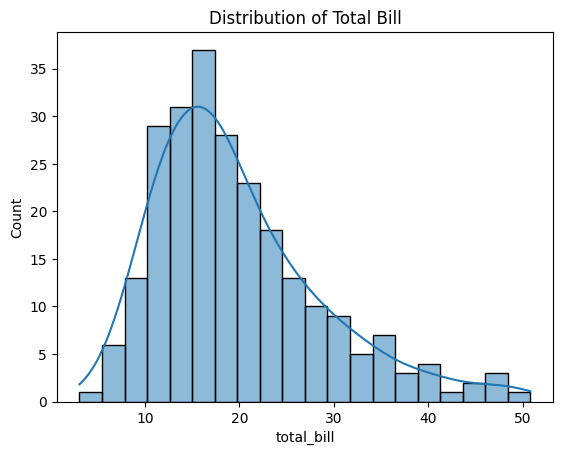

In [14]:
sns.histplot(
    tips['total_bill'],
    bins=20, kde=True
)

plt.title("Distribution of Total Bill")
plt.show()

*Analysis:*
- Most bills range between $10 - $40.
- A right-skewed distribution indicates that few customers spend significantly more.

*Distribution of Tips Amounts*

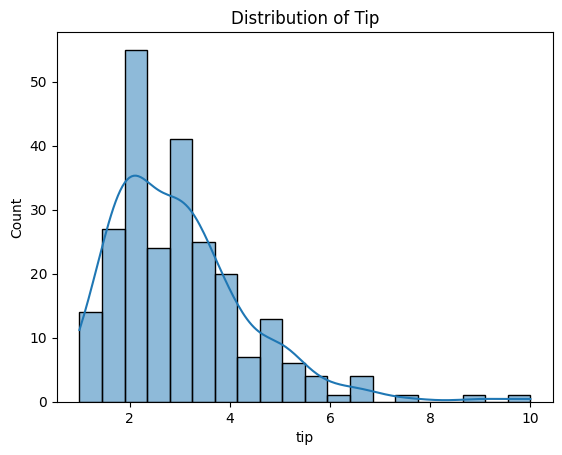

In [15]:
sns.histplot(
    tips['tip'],
    bins=20, kde=True
)

plt.title("Distribution of Tip")
plt.show()

*Analysis:*
- Majority of tips are between $1 - $5.
- Some customers tip significantly higher amounts, but they are outliers.

*Customer Count by Day*

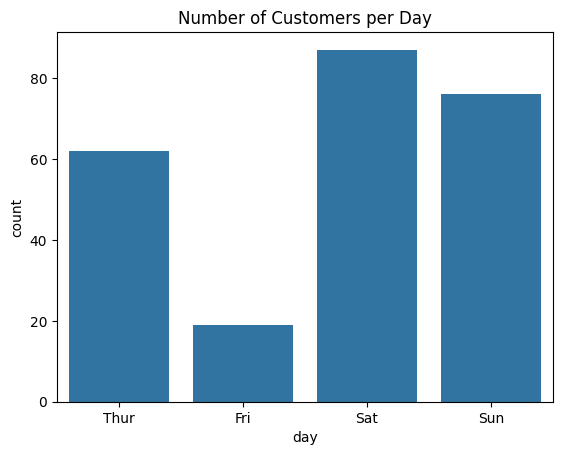

In [16]:
sns.countplot(
    x="day",
    data=tips
)

plt.title("Number of Customers per Day")
plt.show()

*Analysis:*
- Busiest Days: Thursday, Saturday, and Sunday
- Least Busy: Friday

**4.Bivariate Analysis:**

*Total Bill Vs Tip Amount*

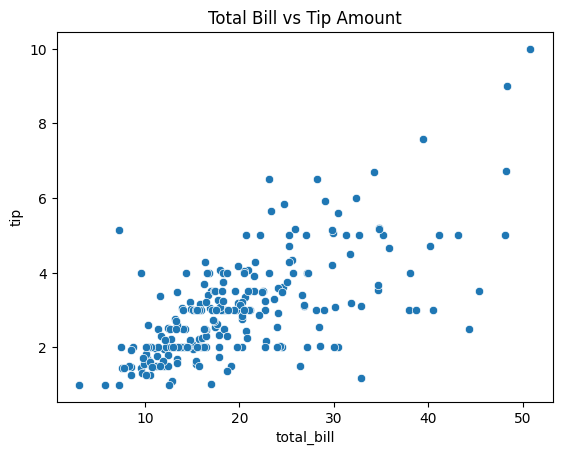

In [21]:
sns.scatterplot(
    x="total_bill",
    y="tip",
#    hue="day",
    data=tips
)

plt.title("Total Bill vs Tip Amount")
plt.show()

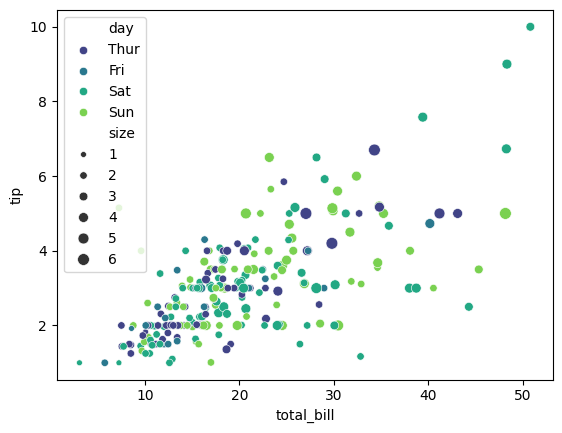

In [42]:
sns.scatterplot(
    x="total_bill",
    y="tip",
    hue="day",
    size="size",
    data=tips,
    palette="viridis"
)

plt.show()

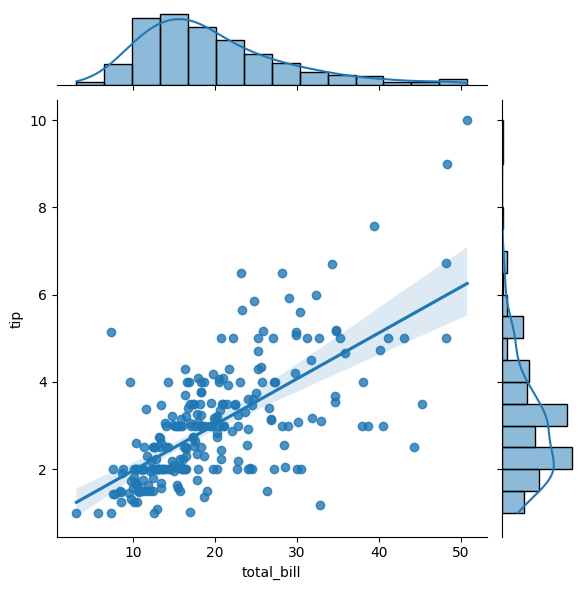

In [37]:
sns.jointplot(
    x="total_bill",
    y="tip",
    data=tips,
    kind="reg"
)

plt.show()

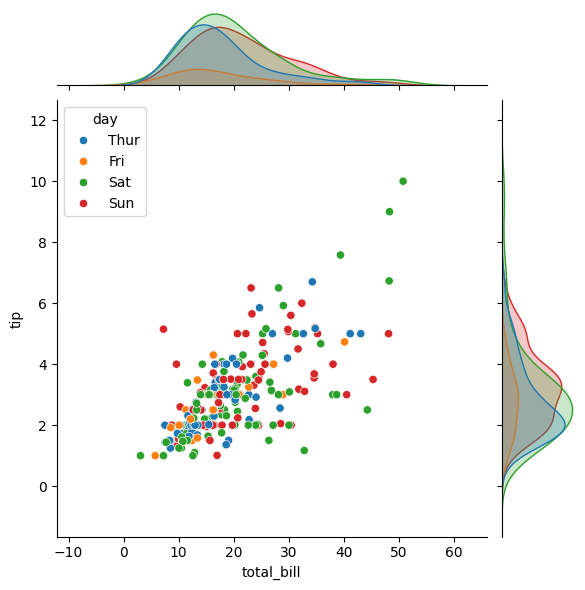

In [41]:
sns.jointplot(
    x="total_bill",
    y="tip",
    hue="day",
    data=tips,
    kind="scatter"
)

plt.show()

*Analysis:*

- Strong positive correlation: Higher total bills tend to have higher tip amounts.
- However, the tip percentage varies across bills, suggesting non-lnear tipping habits.



**Tip Percentage by Gender**

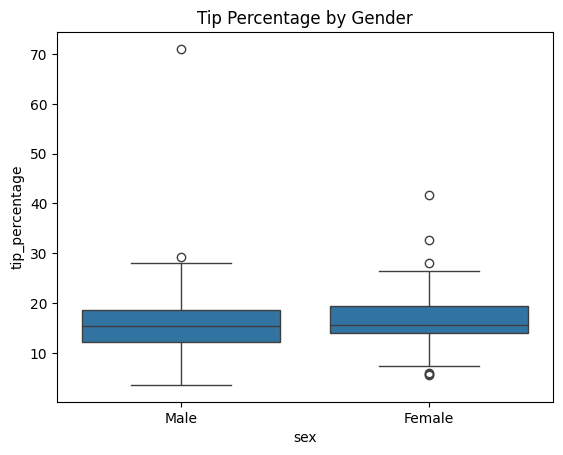

In [25]:
tips['tip_percentage'] = tips['tip'] / tips['total_bill'] * 100
sns.boxplot(
    x="sex",
    y="tip_percentage",
    data=tips
)

plt.title("Tip Percentage by Gender")
plt.show()

*Analysis:*

- On average, female customers tend to tip slightly more than male customers.

**Tips on Different Days**

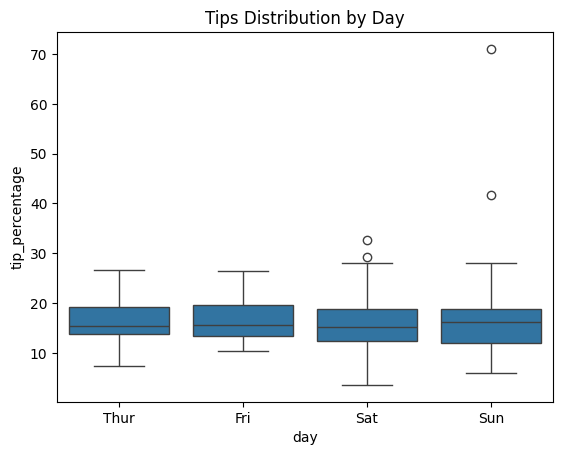

In [26]:
sns.boxplot(
    x="day",
    y="tip_percentage",
    data=tips
)

plt.title("Tips Distribution by Day")
plt.show()

*Analysis:*
- Saturday and Sunday have higher total tips, possibly due to larger dining groups.

**Effect of Smoking on tip Amount**

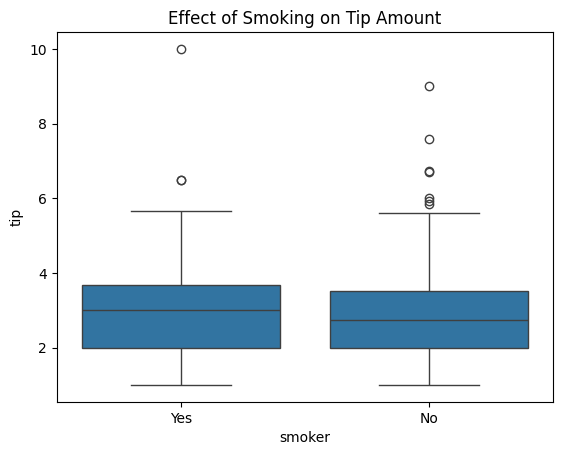

In [28]:
sns.boxplot(
    x="smoker",
    y="tip",
    data=tips
)

plt.title("Effect of Smoking on Tip Amount")
plt.show()

*Analysis:*
- No significant difference between smokers and non - smokers in terms of tipping amount

**5.Multivariate Analysis**

*Total Bill vs Tip, colored by Gender*

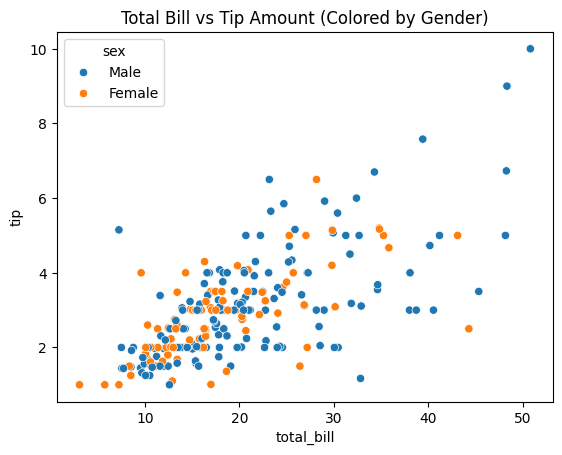

In [30]:
sns.scatterplot(
    x="total_bill",
    y="tip",
    hue="sex",
    data=tips
)

plt.title("Total Bill vs Tip Amount (Colored by Gender)")
plt.show()

*Analysis:*
- Males and females follow similar tipping trends.
- No strong evidence that smokers tip differently than non-smokers.

*Total Bill vs Tip, Separated by Smoking Status*

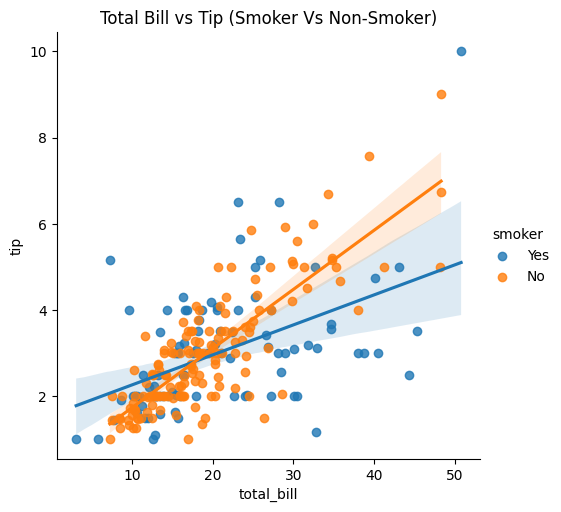

In [31]:
sns.lmplot(
    x="total_bill",
    y="tip",
    hue="smoker",
    data=tips
)

plt.title("Total Bill vs Tip (Smoker Vs Non-Smoker)")
plt.show()

*Analysis:*
- Larger groups tends to leave higher absolutes tip amounts.
- However, tip percentage decreases as group size increses.

**6. Summary of Findings**

*Key Takeaways:*

- Total bill and tip amount are positiveky correlates, but tipping percentage varies.
- Female customers slightly tip more tha males on average.
- Smoking status does not significantly impact tipping behavior.
- Saturday and Sunday are peak tipping days, likely due lower tip percentages.
- Large groups tip more in absolute terms but give lower tip percentages.
- Dinner is more common than lunch, and siners spend more at dinner.


**7. Conclusion**

This analysis provides useful insights into customer tipping behavior at restaurants. Future research could explore additional factors like waiter service quality or time spent dining to refine these observations further.